In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
import matplotlib.pyplot as plt

In [2]:
V = 'lambda_m*(sqrt(6)*tanh(phi/sqrt(6)))**2'
parameter = {'lambda_m': 2.05e-11}
potential = PotentialFunction.from_string(V, param_values=parameter)

In [3]:
background = Background(potential, phi0= 6.4)
sol = background.solver()

In [4]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (background.data(save=True)[i] for i in vars)


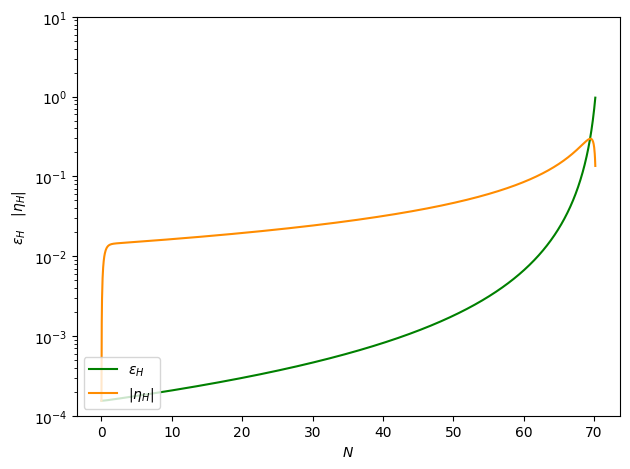

In [5]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')

plt.yscale('log')
plt.ylim(1e-4, 10)
plt.xlabel(r'$N$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 3)
#plt.title('Slow-roll parameters')
plt.tight_layout()


In [6]:
pert = Perturbations(potential, background, scale= 'CMB', N_CMB = 55)
sol_pivot = pert.Power_spectra_pivot()


Curvature power spectrum at pivot scale is 2.077632191892115e-09
Tensor to scalar ratio at pivot scale is 0.003869909983418646


In [7]:
PS = pert.Power_spectrum(save=True)

Computing P(k): 100%|██████████| 1000/1000 [01:12<00:00, 13.70it/s]


/Users/flaviopineda/Desktop/primordialpy/primordialpy/perturbations.py:610: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='best')


Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

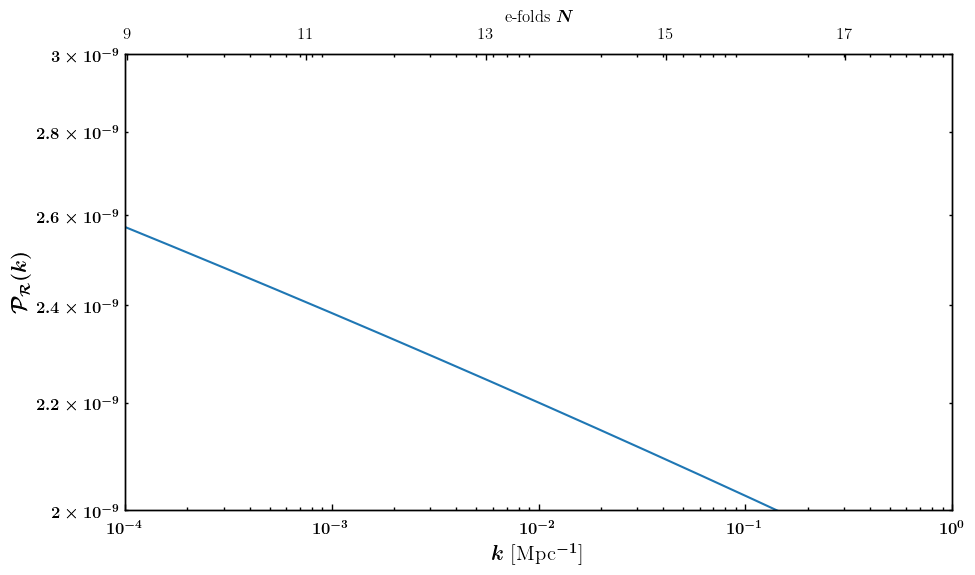

In [8]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save= True)


In [9]:
print(pert.Spectral_tilts)

{'n_s': 0.9636710423549028, 'n_t': -0.0006182437812590948}
